In [3]:
#Importing required library
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading data from the link
url= "http://bit.ly/w-data"

a=pd.read_csv(url)

In [5]:
#printing the top 10 data from the dataset
a.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#a short statistical summary of dataset
a.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#a short statstical summary of the dataset,including categorical value
a.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#no. of missing values in each row
a.isnull().sum()

Hours     0
Scores    0
dtype: int64

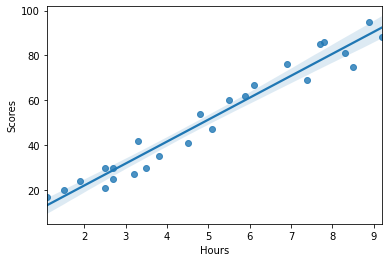

In [8]:
#importing necessary libraries for plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='Hours', y='Scores', data=a)

From the above graph it is quite clear that they both have linear relation between them.

In [9]:
training_dataset_length = math.ceil(len(a)* .75)
print(training_dataset_length)

19


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(a)

In [11]:
train_data = scaled_data[0:training_dataset_length ,: ]
x_train=[]
y_train=[]
for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])

In [12]:

#Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into 3-D array
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train.shape

(9, 10, 1)

In [14]:
y_train.shape

(9,)

In [15]:
#Test data set
#test_data = scaled_data[0:testing_dataset_length  , : ]
test_data = scaled_data[training_dataset_length - 10: , : ]

#splitting the x_test and y_test data sets
x_test = []
y_test1 = []
y_test =  scaled_data[training_dataset_length : , : ] 

for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])
    #y_test1.append(test_data[i-10:i,0])
    y_test1.append(test_data[i,0])
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#print(x_test.shape)
y_test1 = np.array(y_test)

In [16]:
x_test

array([[0.19753086, 0.81481481, 0.59259259, 0.41975309, 0.27160494,
        0.        , 0.96296296, 0.17283951, 0.09876543, 0.61728395],
       [0.81481481, 0.59259259, 0.41975309, 0.27160494, 0.        ,
        0.96296296, 0.17283951, 0.09876543, 0.61728395, 0.77777778],
       [0.59259259, 0.41975309, 0.27160494, 0.        , 0.96296296,
        0.17283951, 0.09876543, 0.61728395, 0.77777778, 0.19753086],
       [0.41975309, 0.27160494, 0.        , 0.96296296, 0.17283951,
        0.09876543, 0.61728395, 0.77777778, 0.19753086, 0.45679012],
       [0.27160494, 0.        , 0.96296296, 0.17283951, 0.09876543,
        0.61728395, 0.77777778, 0.19753086, 0.45679012, 0.33333333],
       [0.        , 0.96296296, 0.17283951, 0.09876543, 0.61728395,
        0.77777778, 0.19753086, 0.45679012, 0.33333333, 0.71604938]])

In [17]:
y_test

array([[0.77777778, 0.66666667],
       [0.19753086, 0.16666667],
       [0.45679012, 0.47435897],
       [0.33333333, 0.23076923],
       [0.71604938, 0.75641026],
       [0.82716049, 0.88461538]])

In [18]:
x_test.shape

(6, 10)

In [20]:
y_test.shape

(6, 2)

In [21]:
import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1), activation = 'sigmoid'))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True, activation = 'sigmoid'))
model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True, activation = 'sigmoid'))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(x_train,y_train, epochs=50, batch_size=25)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1011
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1216
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0968
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1430
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1485
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1482
Epoch 10/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 11/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1199
Epoch 12/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 13/50
1/1 [==============================] - 0s 1ms/step - loss: 0.

In [23]:
print(x_test)
y_pred=x_test

[[0.19753086 0.81481481 0.59259259 0.41975309 0.27160494 0.
  0.96296296 0.17283951 0.09876543 0.61728395]
 [0.81481481 0.59259259 0.41975309 0.27160494 0.         0.96296296
  0.17283951 0.09876543 0.61728395 0.77777778]
 [0.59259259 0.41975309 0.27160494 0.         0.96296296 0.17283951
  0.09876543 0.61728395 0.77777778 0.19753086]
 [0.41975309 0.27160494 0.         0.96296296 0.17283951 0.09876543
  0.61728395 0.77777778 0.19753086 0.45679012]
 [0.27160494 0.         0.96296296 0.17283951 0.09876543 0.61728395
  0.77777778 0.19753086 0.45679012 0.33333333]
 [0.         0.96296296 0.17283951 0.09876543 0.61728395 0.77777778
  0.19753086 0.45679012 0.33333333 0.71604938]]
